# HSE 2021: Mathematical Methods for Data Analysis

## Homework 4

**Warning 1**: You have 3 weeks for this assignemnt.  **it is better to start early (!)**

**Warning 2**: it is critical to describe and explain what you are doing and why, use markdown cells


### Contents

#### Decision Trees - 7 points
* [Task 1](#task1) (0.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (2 points)
* [Task 4](#task4) (0.5 points)
* [Task 5](#task5) (0.5 points)
* [Task 6](#task6) (2 points)
* [Task 7](#task7) (0.5 points)
* [Task 8](#task8) (0.5 points)

#### Ensembles - 3 points
* [Task 1](#task2_1) (1 point)
* [Task 2](#task2_2) (0.7 points)
* [Task 3](#task2_3) (0.5 points)
* [Task 4](#task2_4) (0.7 points)
* [Task 5](#task2_5) (0.1 points)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (11, 5)
%matplotlib inline

# Part 1. Decision Tree Regressor

In this task you will be implementing decision tree for the regression by hands. 

### Task 1 <a id="task1"></a> (0.5 points)

Implement the function `H()` which calculates impurity criterion. We will be training regression tree, therefore, impurity criterion will be variance.

* You cannot use loops
* If `y` is empty, the function should return 0

In [2]:
def H(y):
    """
    Calculate impurity criterion
    
    Parameters
    ----------
    y : np.array
        array of objects target values in the node

    Returns
    -------
    H(R) : float
        Impurity in the node (measuread by variance)
    """
    if y.shape[0] == 0:
        return 0
    
    return y.var()
    

In [3]:
# Test the function
assert np.allclose(H(np.array([4,2,2, 2])), 0.75)
assert np.allclose(H(np.array([])), 0.0)

### Task 2 <a id="task2"></a>  (0.5 points)

To find the best split in the node we need to calculate the cost function. Denote: 
- `R` all the object in the node
- `j` index of the feature selected for the split
- `t` threshold
- `R_l` and `R_r` objects in the left and right child nodes correspondingly

We get the following cost function:

$$
Q(R, j, t) =\frac{|R_\ell|}{|R|}H(R_\ell) + \frac{|R_r|}{|R|}H(R_r) \to \min_{j, t},
$$

Implement the function `Q`, which should calculate value of the cost function for a given feature and threshold.

In [4]:
def Q(X, y, j, t):
    """
    Calculate cost function
    Parameters
    ----------
    X : ndarray
        array of objects in the node 
    y : ndarray
        array of target values in the node 
    j : int
        feature index (column in X)
    t : float
        threshold

    Returns
    -------
    Q : float
        Value of the cost function
    """   

    yr = y[X[:,j] > t]
    yl = y[X[:,j] <= t]
    
    return yl.size / y.size * H(yl) + yr.size / y.size * H(yr)

### Task 3 <a id="task3"></a>  (2 points)

Now, let's implement `MyDecisionTreeRegressor` class. More specifically, you need to implement the following methods:

- `best_split`
- `grow_tree`
- `get_prediction`

Read docstrings for more details. Do not forget to use function `Q` implemented above, when finding the `best_split`

In [5]:
class Node(object):
    """
    Class for a decision tree node.
    
    Parameters
    ----------
    right : Node() or None
        Right child
    right : Node() or None
        Left child
    threshold: float
        
    column: int
        
    depth: int
        
    prediction: float
        prediction of the target value in the node (average values calculated on a train dataset)
    is_terminal:bool
        indicates whether it is a terminal node (leaf) or not
    """    
    def __init__(self):        
        self.right = None
        self.left = None
        self.threshold = None
        self.column = None
        self.depth = None
        self.is_terminal = False
        self.prediction = None
        
    def __repr__(self):
        if self.is_terminal:
            node_desc = 'Pred: {:.2f}'.format(self.prediction)
        else:
            node_desc = 'Col {}, t {:.2f}, Pred: {:.2f}'.format(self.column, self.threshold, self.prediction)
        return node_desc

In [6]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class MyDecisionTreeRegressor(RegressorMixin, BaseEstimator):
    """
    Class for a Decision Tree Regressor.

    Parameters
    ----------
    max_depth : int
        Max depth of a decision tree.
    min_samples_split : int
        Minimal number of samples (objects) in a node to make a split.
    """ 
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
            
    def best_split(self, X, y):
        """
        Find the best split in terms of Q of data in a given decision tree node. 
        Try all features and thresholds. 
        
        Parameters
        ----------
        X : ndarray, shape (n_objects, n_features)
            Objects in the parent node
        y : ndarray, shape (n_objects, )
            1D array with the object labels. 
            
        Returns
        -------
        best_split_column : int
            Index of the best split column
        best_threshold : float
            The best split condition.
        X_left : ndarray, shape (n_objects_l, n_features)
            Objects in the left child
        y_left : ndarray, shape (n_objects_l, )
            Objects labels in the left child. 
        X_right : ndarray, shape (n_objects_r, n_features)
            Objects in the right child
        y_right : ndarray, shape (n_objects_r, )
            Objects labels in the right child. 
        """
        
        # To store best split parameters
        best_split_column = None
        best_threshold = None
        # without splitting
        best_cost = H(y) 
        
        for feature in range(X.shape[1]):
            for threshold in np.unique(X[:,feature]):
                new_Q = Q(X, y, feature, threshold)
                if new_Q <= best_cost:
                    best_split_column = feature
                    best_threshold = threshold
                    best_cost = new_Q
                
        
        
        X_left = X[X[:,best_split_column] <= best_threshold]
        X_right = X[X[:,best_split_column] > best_threshold]
        
        y_left = y[X[:,best_split_column] <= best_threshold]
        y_right = y[X[:,best_split_column] > best_threshold]
        return best_split_column, best_threshold, X_left, y_left, X_right, y_right
    
    def is_terminal(self, node, y):
        """
        Check terminality conditions based on `max_depth` and `min_samples_split` parameters for a given node. 
        
        Parameters
        ----------
        node : Node, 
            
        y : ndarray, shape (n_objects, )
            Object labels. 
            
        Returns
        -------
        Is_termial : bool
            If True, node is terminal
        """
        if node.depth >= self.max_depth:    
            return True
        if len(y) < self.min_samples_split:   
            return True
        return False
        
    def grow_tree(self, node, X, y):
        """
        Reccurently grow the tree from the `node` using a `X` and `y` as a dataset:
         - check terminality conditions
         - find best split if node is not terminal
         - add child nodes to the node
         - call the function recursively for the added child nodes
        
        Parameters
        ----------
        node : Node() object
            Current node of the decision tree.
        X : ndarray, shape (n_objects, n_features)
            Objects 
        y : ndarray, shape (n_objects)
            Labels
        """
        
        if self.is_terminal(node, y):
            node.is_terminal = True
            return
        
        # find best split and fill threshold and column fields
        best_split_column, best_threshold, X_left, y_left, X_right, y_right = self.best_split(X, y)
        node.threshold = best_threshold
        node.column = best_split_column
        
        # Add child
        child_left = Node()
        child_right = Node()
        child_left.depth = node.depth + 1
        child_right.depth = node.depth + 1
        
        if y_left.size != 0:
            child_left.prediction = np.mean(y_left)
        else:
            child_left.prediction = 0
            
        if y_right.size != 0:
            child_right.prediction = np.mean(y_right)
        else:
            child_right.prediction = 0
        
        node.left = child_left
        node.right = child_right
        
        # Reccurently grow the tree
        self.grow_tree(child_left, X_left, y_left)
        self.grow_tree(child_right, X_right, y_right)
        

    def fit(self, X, y):
        """
        Fit the Decision Tree Regressor.
            
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The input samples.
        y : ndarray, shape (n_samples,) or (n_samples, n_outputs)
            The target values.
        Returns
        -------
        self : object
            Returns self.
        """
        X, y = check_X_y(X, y, accept_sparse=False)
        self.is_fitted_ = True
        
        # Initialize the tree (root node)
        self.tree_ = Node()                             
        self.tree_.depth = 1                            
        self.tree_.prediction = np.mean(y)
        
        # Grow the tree
        self.grow_tree(self.tree_, X, y)
        return self        
    
    def get_prediction(self, node, x):
        """
        Get prediction for an object `x`
            - Return prediction of the `node` if it is terminal
            - Otherwise, recursively call the function to get predictions of the proper child
        
        Parameters
        ----------
        node : Node() object
            Current node of the decision tree.
        x : ndarray, shape (n_features,)
            Array of feature values of one object.
        Returns
        -------
        y_pred : float
            Prediction for an object x
        """
        if node.is_terminal:
            y_pred = node.prediction
        else:
            if x[node.column] > node.threshold:
                y_pred = self.get_prediction(node.right, x)
            else:
                y_pred = self.get_prediction(node.left, x)
        
        return y_pred
    
    def predict(self, X):
        """ 
        Get prediction for each object in X
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            Returns predictions.
        """
        # Check input and that `fit` had been called
        X = check_array(X, accept_sparse=False)
        check_is_fitted(self, 'is_fitted_')
        
        # Get predictions
        y_predicted = []
        for x in X:
            y_curr = self.get_prediction(self.tree_, x)
            y_predicted.append(y_curr)
        return np.array(y_predicted)

In [7]:
# check yourself
from sklearn.utils.estimator_checks import check_estimator

check_estimator(MyDecisionTreeRegressor())

/usr/local/lib/python3.9/site-packages/sklearn/utils/estimator_checks.py:3063: FutureWarning: As of scikit-learn 0.23, estimators should expose a n_features_in_ attribute, unless the 'no_validation' tag is True. This attribute should be equal to the number of features passed to the fit method. An error will be raised from version 1.0 (renaming of 0.25) when calling check_estimator(). See SLEP010: https://scikit-learn-enhancement-proposals.readthedocs.io/en/latest/slep010/proposal.html
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/estimator_checks.py:3105: FutureWarning: As of scikit-learn 0.23, estimators should have a 'requires_y' tag set to the appropriate value. The default value of the tag is False. An error will be raised from version 1.0 when calling check_estimator() if the tag isn't properly set.
  warnings.warn(warning_msg, FutureWarning)


### Task 4 <a id="task4"></a>  (0.5 points)

Load boston dataset and split it on the train ($70\%$) and test ($30\%$). Fit Decision Tree of depth 1 and make the following plot:

- Scatter plot of the traning points (selected for split feature on the x-axis, target variable on the y-axis)
- Fitted model 

In [8]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
y = boston['target']
dataPD = pd.DataFrame(data= np.c_[boston['data'], boston['target']], 
                      columns=np.append(boston['feature_names'], ['target']))
dataPD

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42,
                                                    shuffle=True)
model = MyDecisionTreeRegressor(max_depth=2)
model.fit(X_train, y_train)

MyDecisionTreeRegressor(max_depth=2)

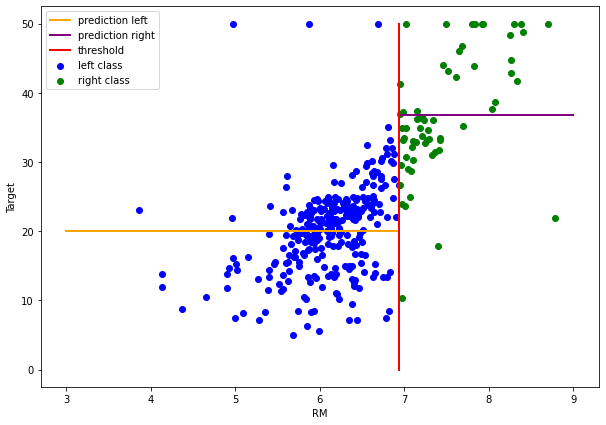

In [10]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

column = model.tree_.column
threshold =  model.tree_.threshold

X_left = X_train[X_train[:,column] <= threshold]
X_right = X_train[X_train[:,column] > threshold]
        
y_left = y_train[X_train[:,column] <= threshold]
y_right = y_train[X_train[:,column] > threshold]

plt.figure(figsize=(10,7))
plt.scatter(X_left[:,column], y_left, color="blue", label="left class")
plt.scatter(X_right[:,column], y_right, color="green", label="right class")
plt.ylabel("Target")
plt.xlabel(boston['feature_names'][model.tree_.column])
plt.plot([3, model.tree_.threshold], [model.tree_.left.prediction, model.tree_.left.prediction],
         'k-', lw=2, color='orange', label="prediction left")
plt.plot([model.tree_.threshold, 9], [model.tree_.right.prediction, model.tree_.right.prediction],
         'k-', lw=2, color='purple', label="prediction right")
plt.plot([model.tree_.threshold, model.tree_.threshold], [0, 50], 'k-', lw=2, color='red', label="threshold")
plt.legend()
plt.show()

### Task 5 <a id="task5"></a>  (0.5 points)

Keep working with boston dataset. 
- Use `GridSearchCV` to find the best hyperparameters (`max_depth` and `min_samples_split`) on 5-Fold cross-validation
- Train the model with the best set of hyperparameters on the whole train dataset. 
- Report `RMSE` on test dataset and hyperparameters of the best estimator. 

In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : range(2, 15), 'min_samples_split' : range(1, 15)}
model = MyDecisionTreeRegressor()
clf = GridSearchCV(model, parameters, verbose=10, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 182 candidates, totalling 910 fits


{'max_depth': 6, 'min_samples_split': 1}

In [12]:
from sklearn.metrics import mean_squared_error

model = MyDecisionTreeRegressor(max_depth=clf.best_params_['max_depth'],
                                min_samples_split=clf.best_params_['min_samples_split'])
model.fit(X_train, y_train)
result = model.predict(X_test)
mean_squared_error(y_test, result, squared=False)

4.4012885682725

### Task 6 <a id="task6"></a>  (2 points)

Recall definition of bias and variance:
$$
\text{Bias}^2 = \mathbb{E}_{p(x, y)} \left[  (f(x) - \mathbb{E}_{\mathbb{X}}a_{\mathbb{X}}(x))^2 \right] \\
\text{Variance} = \mathbb{E}_{p(x, y)} \left[  \mathbb{V}_{\mathbb{X}}( a_{\mathbb{X}}(x))  \right]
$$

We wil now use use the following algorithm to estimate bias and variance:

1. Use bootsrap to create `n_iter` samples from the original dataset: $X_1, \dots, X_{n\_iter}$
2. For each bootstrapped sample define out-of-bag (OOB) sample $Z_1, \dots, Z_{n_iter}$, which contain all the observations, which did not appear in the corresponding boostraped sample
3. Fit the model on $X_i$s and compute predictions on $Z_i$s
4. For a given *object* $n$:
     - bias^2: squared difference between true value $y_n$ and average prediction (average over the algorithms, for which $n$ was in OOB)
     - variance: variance of the prediction (predictions of the algorithms, for which $n$ was in OOB)
5. Average bias^2 and variance over all the points
    
**Implement `get_bias_variance` function, using the algorithm above**

*Note:*  You can only use 1 loop (for bootsrap iterations). All other operations should be vectorized. 

In [13]:
from tqdm import tqdm

def get_bias_variance(estimator, x, y, n_iter):
    """ 
    Calculate bias and variance of the `estimator`. Using a given dataset and bootstrap with `n_iter` samples. 

    Parameters
    ----------
    x : ndarray, shape (n_samples, n_features)
        The input samples.
    y : ndarray, shape (n_samples, n_features)
        The input samples.
    n_iter: int
        Number of samples in 
    Returns
    -------
    bias2 : float, 
        Estiamted squared bias
    variance : float, 
        Estiamted variance
    """
    
    variance = np.array([])
    bias2 = np.array([])
    prediction_matrix = np.empty((len(x), 1))
    prediction_matrix[:] = np.nan
    
    for i in tqdm(range(n_iter)):
        boost_indexes = np.random.randint(len(x), size=len(x))
        boost_x = x[boost_indexes]
        boost_y = y[boost_indexes]
        
        OOB_indexes = np.setdiff1d(np.array(range(len(x))), boost_indexes)
        OOB_x = x[OOB_indexes]
        OOB_y = y[OOB_indexes]
        
        estimator.fit(boost_x, boost_y)
        prediction = estimator.predict(OOB_x)
        
        tmp = np.empty(len(x))
        tmp[:] = np.NaN
        np.put(tmp, OOB_indexes, prediction)
        
        prediction_matrix = np.column_stack((prediction_matrix, tmp))
        
    
    prediction_matrix = np.delete(prediction_matrix, 1, axis=1)
    
    variance = np.nanvar(prediction_matrix, axis=1)
    bias2 = np.square(y - np.nanmean(prediction_matrix, axis=1))
    
    return np.nanmean(bias2), np.nanmean(variance)
        

In [14]:
# Test
estimator = MyDecisionTreeRegressor(max_depth=8, min_samples_split=15)

get_bias_variance(estimator, X_train, y_train, 25)

100%|██████████| 25/25 [00:08<00:00,  2.82it/s]


(18.428249158680412, 10.340433293037712)

### Task 7 <a id="task7"></a>  (0.5 points)

Compute bias and variance for the trees of different depths. Plot how bias and variance change as depth increases. 

Comment on what you observe, how does your result correspond to what we have discussed in class?

In [15]:
import warnings
warnings.filterwarnings('ignore')

values_bias = np.array([])
values_variance = np.array([])
depth_range = range(2, 15)

for depth in depth_range:
    model = MyDecisionTreeRegressor(max_depth=depth, min_samples_split=4)
    bias, variance = get_bias_variance(model, X_train, y_train, 25)
    values_bias = np.append(values_bias, [bias])
    values_variance = np.append(values_variance, [variance])


100%|██████████| 25/25 [00:14<00:00,  1.75it/s]


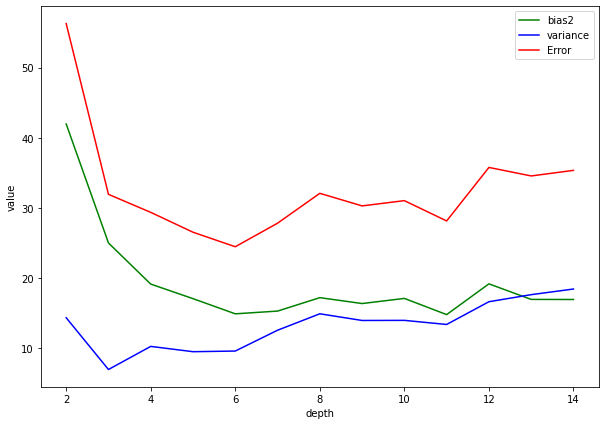

In [16]:
plt.figure(figsize=(10,7))
plt.plot(depth_range, values_bias, color='green', label='bias2')
plt.plot(depth_range, values_variance, color='blue', label='variance')
plt.plot(depth_range, values_bias + values_variance, color='red', label='Error')
plt.xlabel('depth')
plt.ylabel('value')
plt.legend()
plt.show()

### Comments

As we say in class high variance usually means that model is overfitted and high bias usually means that model is underfitted. As we can see from the graph, as the depth increases, the bias decreases and the variance increases. At depth 6, the minimum error is reached, which corresponds to the result of GridSearch optimal depth. Further the situation worsens, apparently due to overtraining, such conclusion can be made by the increasing variance. 

### Task 8 <a id="task8"></a>  (0.5 points)

Let's try to reduce variance with bagging. Use `sklearn.ensemble.BaggingRegressor` to get an ensemble and compute its bias and variance. 

Answer the following questions:
 - How bagging should affect bias and variance in theory?
 - How bias and variance change (if they change) compared to an individual tree in you experiments? 
 - Do your results align with the theory? Why?

In [17]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(base_estimator=MyDecisionTreeRegressor(max_depth=8, min_samples_split=15), n_jobs=-1, n_estimators=100)
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=MyDecisionTreeRegressor(max_depth=8,
                                                        min_samples_split=15),
                 n_estimators=100, n_jobs=-1)

In [18]:
result = model.predict(X_test)
print('RMSE =', mean_squared_error(y_test, result, squared=False))

RMSE = 3.366156397356335


In [19]:
get_bias_variance(model, X_train, y_train, 20)

100%|██████████| 20/20 [00:54<00:00,  2.74s/it]


(16.59554739601765, 2.1733093024133425)

### Comments

In theory, this method should reduce the variance without affecting the bias. In the experiment we obtained results confirming the theory. We can notice that the bias measurements are practically unchanged, while the variance has become much smaller. This is achieved by using bootstrap for fitting several models and than aggregate their individual predictions.

# Part 2. More Ensembles

In this part we will be working with [Thyroid Disease Data Set](https://archive.ics.uci.edu/ml/datasets/thyroid+disease) to solve a classification task. 

In [20]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('thyroid_disease.csv')

le = LabelEncoder()
y = le.fit_transform(df['Class'])
X = df.drop('Class', axis=1)
X.head(5).transpose()

,0,1,2,3,4
age,41.0,23.0,46.0,70.0,70.0
sex,F,F,M,F,F
on_thyroxine,f,f,f,t,f
query_on_thyroxine,f,f,f,f,f
on_antithyroid_medication,f,f,f,f,f
sick,f,f,f,f,f
pregnant,f,f,f,f,f
thyroid_surgery,f,f,f,f,f
I131_treatment,f,f,f,f,f
query_hypothyroid,f,f,f,f,f


### Task 1 <a id="task2_1"></a> (1 point)

Let's start with data preprocessing. 

0. Drop columns, which are not usefull (e.g. a lot of missing values). Motivate your choice. 
1. Split dataset into train and test
2. You've probably noticed that we have both categorical and numerical columns. Here is what you need to do with them:
    - Categorical: Fill missing values and apply one-hot-encoding
    - Numeric: Fill missing values
    
Use `ColumnTranformer` to define a single transformer for all the columns in the dataset. It takes as input a list of tuples

```
ColumnTransformer([
    ('name1', transorm1, column_names1),
    ('name2', transorm2, column_names2)
])
```

Pay attention to an argument `remainder='passthrough'`. [Here](https://scikit-learn.org/stable/modules/compose.html#column-transformer) you can find some examples of how to use column transformer. 
    
Since we want to apply 2 transformations to categorical feature, it is very convenient to combine them into a `Pipeline`:

```
double_tranform = make_pipeline(
                        transform_1,
                        transform_2
                        )
```

P.S. Choose your favourite way to fill missing values. 

*Hint* Categorical column usually have `dtype = 'object'`. This may help to obtain list of categorical and numerical columns on the dataset. 

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [22]:
X.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [23]:
X.describe(include=['O']).transpose()

,count,unique,top,freq
sex,3622,2,F,2480
on_thyroxine,3772,2,f,3308
query_on_thyroxine,3772,2,f,3722
on_antithyroid_medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid_surgery,3772,2,f,3719
I131_treatment,3772,2,f,3713
query_hypothyroid,3772,2,f,3538
query_hyperthyroid,3772,2,f,3535


In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

transforms = [
    ('sex_tr', make_pipeline(SimpleImputer(strategy='most_frequent'),
                                   OneHotEncoder()) , ['sex']),
    ('on_thyroxine_tr', OneHotEncoder(), ['on_thyroxine']),
    ('referral_source_tr', OneHotEncoder(), ['referral_source']),
    ('age_tr', SimpleImputer(strategy='median'), ['age']),
    ('TSH_tr', SimpleImputer(strategy='median'), ['TSH']),  
    ('T3_tr', SimpleImputer(strategy='median'), ['T3']),
    ('TT4_tr', SimpleImputer(strategy='median'), ['TT4']),
    ('T4U_tr', SimpleImputer(strategy='median'), ['T4U']),
    ('FTI_tr', SimpleImputer(strategy='median'), ['FTI']),
]

column_transformer = ColumnTransformer(transforms, remainder='drop', n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Transform the data
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

### Comments

It was chosen to remove most of the columns, according to the following principle, columns with many empty values, columns that indicate the presence of data and columns where most of the data is the same. The median was taken according to the principle of substitution, because we could see outliers in the data affecting the average. 

### Task 2 <a id="task2_2"></a> (0.7 points)

Fit and compare 5 different models (use sklearn): Gradient Boosting, Random Forest, Decision Tree, SVM, Logitics Regression
    
* Choose one classification metric and justify your choice .
* Compare the models using score on cross validation. Mind the class balance when choosing the cross validation. (You can read more about different CV strategies [here](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold))
* Which model has the best performance? Which models overfit or underfit?

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score

scores = {'f1' : make_scorer(f1_score)}

gradientModel = GradientBoostingClassifier()
cv_results_gradientBoosting = cross_validate(gradientModel, X_train, y_train, scoring=scores,
                                             cv=StratifiedKFold(), n_jobs=-1, return_train_score=True)
pd.DataFrame(cv_results_gradientBoosting)

,fit_time,score_time,test_f1,train_f1
0,0.212082,0.001606,0.945946,0.993197
1,0.210367,0.001602,0.833333,0.986395
2,0.208793,0.001631,0.880000,0.996610
3,0.209537,0.001535,0.833333,0.993197
4,0.208496,0.001515,0.820513,0.989761


In [26]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier()
cv_results_randomForest = cross_validate(randomForestModel, X_train, y_train, scoring=scores,
                                         cv=StratifiedKFold(), n_jobs=-1, return_train_score=True)
pd.DataFrame(cv_results_randomForest)

,fit_time,score_time,test_f1,train_f1
0,0.147588,0.009868,0.882353,1.0
1,0.151142,0.009936,0.852941,1.0
2,0.149061,0.010002,0.828571,1.0
3,0.148667,0.009951,0.857143,1.0
4,0.149953,0.010144,0.816901,1.0


In [27]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier()
cv_results_decisionTree = cross_validate(decisionTreeModel, X_train, y_train, scoring=scores,
                                         cv=StratifiedKFold(), n_jobs=-1, return_train_score=True)
pd.DataFrame(cv_results_decisionTree)

,fit_time,score_time,test_f1,train_f1
0,0.003589,0.000854,0.891892,1.0
1,0.003058,0.000826,0.880000,1.0
2,0.003091,0.000841,0.894737,1.0
3,0.002931,0.000989,0.876712,1.0
4,0.003070,0.000768,0.864865,1.0


In [28]:
from sklearn.svm import SVC

SVCModel = SVC()
cv_results_SVC = cross_validate(SVCModel, X_train, y_train, scoring=scores,
                                cv=StratifiedKFold(), n_jobs=-1, return_train_score=True)
pd.DataFrame(cv_results_SVC)

,fit_time,score_time,test_f1,train_f1
0,0.042572,0.018782,0.0,0.0
1,0.043444,0.018672,0.0,0.0
2,0.044367,0.019108,0.0,0.0
3,0.045146,0.018926,0.0,0.0
4,0.041490,0.018454,0.0,0.0


In [29]:
from sklearn.linear_model import LogisticRegression

logisticRegressionModel = LogisticRegression()
cv_results_logisticRegression = cross_validate(logisticRegressionModel, X_train, y_train, scoring=scores,
                                               cv=StratifiedKFold(), n_jobs=-1, return_train_score=True)
pd.DataFrame(cv_results_logisticRegression)

,fit_time,score_time,test_f1,train_f1
0,0.029553,0.000883,0.828571,0.666667
1,0.028242,0.000891,0.557377,0.682353
2,0.027508,0.000892,0.646154,0.687500
3,0.027536,0.000884,0.596491,0.663968
4,0.029120,0.000900,0.625000,0.702703


### Comments 

To test the models we chose parameter f1 because we are solving the problem of binary classification and this metric is the best way to do it.
The best results for f1 are shown by gradientBoosting. RandomForestClassifier and DecisionTreeClassifier, even though they were faster, showed less good values. The worst results were showen by SVM and LogisticRegression.

As for overfit, it can be seen in a not very strong form in RandomForestClassifier and DecisionTreeClassifier, as on the trained sample f1 shows 1 on the test sample much less. LogisticRegression clearly underfit and shows disgusting parameters everywhere. As for SVM, it just works strangely and assigning 0 to everything.

### Task 3 <a id="task2_3"></a> (0.5 points)

More Gradient Boosting. Choose one of the tree popular boosting implementations (xgboost, lightgbm, catboost). Select hyperparameters (number of trees, learning rate, depth) on cross-validation and compare with the methods from the previous task. 



In [30]:
from catboost import CatBoostClassifier

parameters = {'iterations' : range(90, 111, 5), 
              'learning_rate' : np.linspace(0.01,0.1,7), 
              'depth' : range(5, 15, 2)}

modelCat = CatBoostClassifier()
clf = GridSearchCV(modelCat, parameters, verbose=10, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 175 candidates, totalling 875 fits
0:	learn: 0.6127994	total: 58.8ms	remaining: 5.53s
1:	learn: 0.5447024	total: 61.3ms	remaining: 2.85s
2:	learn: 0.4878271	total: 63.6ms	remaining: 1.95s
3:	learn: 0.4422982	total: 66.3ms	remaining: 1.51s
4:	learn: 0.4004218	total: 68.6ms	remaining: 1.23s
5:	learn: 0.3621398	total: 70.9ms	remaining: 1.05s
6:	learn: 0.3299361	total: 73.2ms	remaining: 920ms
7:	learn: 0.3008512	total: 75.5ms	remaining: 821ms
8:	learn: 0.2772166	total: 77.8ms	remaining: 743ms
9:	learn: 0.2553738	total: 80.2ms	remaining: 681ms
10:	learn: 0.2337176	total: 80.9ms	remaining: 618ms
11:	learn: 0.2150528	total: 83.2ms	remaining: 575ms
12:	learn: 0.1986301	total: 85.6ms	remaining: 540ms
13:	learn: 0.1857192	total: 87.8ms	remaining: 508ms
14:	learn: 0.1721373	total: 90.1ms	remaining: 480ms
15:	learn: 0.1603820	total: 92.4ms	remaining: 456ms
16:	learn: 0.1495572	total: 94.7ms	remaining: 435ms
17:	learn: 0.1398867	total: 97.1ms	remaining: 415ms
18:	learn: 

{'depth': 9, 'iterations': 95, 'learning_rate': 0.1}

In [31]:
modelCat = modelCat = CatBoostClassifier(iterations=clf.best_params_['iterations'],
                                         learning_rate=clf.best_params_['learning_rate'],
                                         depth=clf.best_params_['depth'])
cv_results_modelCat = cross_validate(modelCat, X_train, y_train, scoring=scores,
                                               cv=StratifiedKFold(), n_jobs=-1, return_train_score=True)
pd.DataFrame(cv_results_modelCat)

,fit_time,score_time,test_f1,train_f1
0,0.480127,0.007061,0.957746,0.957746
1,0.480912,0.006723,0.873239,0.965035
2,0.479405,0.006712,0.901408,0.957746
3,0.473338,0.006185,0.888889,0.954064
4,0.478487,0.004462,0.815789,0.972603


### Comments

From the results we can see that a careful selection of hyperparameters and the use of catboost implementation, can significantly improve the performance. But at the same time there is a decrease in the learning time by more than 2 times. No overfit or underfit was observed.

### Task 4 <a id="task2_4"></a> (0.7 points)

Now let's train more fancy ensembles:

* Bagging with decision trees as base estimators
* Bagging with gradient boosting (with large amount of trees, >100) as base estimators
* [Voting classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) 
* [Stacking Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) with Logistic Regression as a final model
* [Stacking Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) with Gradeint Boosting as a final model


If not stated in the task, feel free to tune / choose hyperparameters and base models.

Answer the questions:
* Which model has the best performance?
* Does bagging reduce overfiting of the gradient boosting with large amount of trees? 
* What is the difference between voting and staking? 

In [32]:
from sklearn.ensemble import BaggingClassifier

baggingClassifierModel = BaggingClassifier()
cv_results_baggingClassifier = cross_validate(baggingClassifierModel, X_train, y_train, scoring=scores,
                                               cv=StratifiedKFold(), n_jobs=-1, return_train_score=True)
pd.DataFrame(cv_results_baggingClassifier)

,fit_time,score_time,test_f1,train_f1
0,0.028700,0.002116,0.916667,0.979310
1,0.027148,0.002081,0.898551,0.989761
2,0.027872,0.002488,0.901408,0.982935
3,0.028535,0.003546,0.888889,0.996610
4,0.028144,0.002020,0.849315,0.983051


In [33]:
baggingClassifierGradBoostingModel = BaggingClassifier(base_estimator=GradientBoostingClassifier(n_estimators=150))
cv_results_baggingClassifierGradBoosting = cross_validate(baggingClassifierGradBoostingModel, X_train, y_train,
                                                          scoring=scores, cv=StratifiedKFold(), n_jobs=-1,
                                                          return_train_score=True)
pd.DataFrame(cv_results_baggingClassifierGradBoosting)

,fit_time,score_time,test_f1,train_f1
0,2.279422,0.011073,0.901408,0.972789
1,2.274999,0.010977,0.864865,0.993243
2,2.285376,0.010850,0.880000,0.993243
3,2.295550,0.010206,0.857143,0.989761
4,2.278953,0.010769,0.826667,0.989761


In [34]:
from sklearn.ensemble import VotingClassifier

clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 = DecisionTreeClassifier()

estimators = [('gb', clf1), ('rf', clf2), ('dt', clf3)]

votingModel = VotingClassifier(estimators=estimators)
cv_results_voting = cross_validate(votingModel, X_train, y_train, scoring=scores,
                                               cv=StratifiedKFold(), n_jobs=-1, return_train_score=True)
pd.DataFrame(cv_results_voting)

,fit_time,score_time,test_f1,train_f1
0,0.360385,0.013644,0.944444,1.0
1,0.363041,0.013774,0.857143,1.0
2,0.363229,0.013674,0.888889,1.0
3,0.360623,0.013380,0.876712,1.0
4,0.357591,0.013437,0.842105,1.0


In [35]:
from sklearn.ensemble import StackingClassifier

stakingLRModel = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
cv_results_stakingLR = cross_validate(stakingLRModel, X_train, y_train, scoring=scores,
                                               cv=StratifiedKFold(), n_jobs=-1, return_train_score=True)
pd.DataFrame(cv_results_stakingLR)

,fit_time,score_time,test_f1,train_f1
0,1.956847,0.010789,0.898551,1.00000
1,1.953310,0.010719,0.911765,1.00000
2,2.002033,0.011226,0.873239,1.00000
3,1.946277,0.010608,0.840580,1.00000
4,1.941720,0.010935,0.864865,0.99661


In [36]:
stakingGBModel = StackingClassifier(estimators=[('rf', clf2), ('dt', clf3)], 
                                    final_estimator=GradientBoostingClassifier())
cv_results_stakingGB = cross_validate(stakingGBModel, X_train, y_train, scoring=scores,
                                               cv=StratifiedKFold(), n_jobs=-1, return_train_score=True)
pd.DataFrame(cv_results_stakingGB)

,fit_time,score_time,test_f1,train_f1
0,0.937352,0.010935,0.931507,1.000000
1,0.932863,0.011086,0.853333,0.996633
2,0.927517,0.010736,0.837838,1.000000
3,0.927748,0.010606,0.888889,1.000000
4,0.927264,0.010725,0.833333,0.989967


### Comments

The best performance show Voting Classifier with GradientBoostingClassifier, RandomForestClassifier and DecisionTreeClassifier. Nearly same performance show stacking models with different final estimators. Bagging a hardly improve overfiting situation with decision trees but didn't show much effect on Gradient Boosting. 

### voting VS staking

The idea of both classifiers is combining different estimators for taking advantages from all of them. The main differance is in the way of combining estimators. VotingClassifier use a majority vote or the average predicted probabilities to predict the class labels. While StackingClassifier use predictions of each individual estimator as input to a final estimator.

### Task 5 <a id="task2_5"></a> (0.1 points)

Report the test score for the best model, that you were able to train. 

In [37]:
final_score = {'fit_time': [cv_results_modelCat['fit_time'].mean()],
               'score_time': [cv_results_modelCat['score_time'].mean()],
               'test_f1': [cv_results_modelCat['test_f1'].mean()],
               'train_f1': [cv_results_modelCat['train_f1'].mean()]}

pd.DataFrame(final_score)

,fit_time,score_time,test_f1,train_f1
0,0.478454,0.006229,0.887415,0.961439


### Comments

The best model I was able to train is CatBoostClassifier with depth = 9, iterations = 95 and learning_rate = 0.1.

I think this model show so good results because I find it hyperparameters with Grid Search, but of course it is really nice model.